# Assignment 6

In [1]:
import pandas as pnd
import numpy as np
from scipy import stats
import scipy.linalg 
import matplotlib.pyplot as plt
import seaborn as sn

##Custom functions used for this script

In [2]:
#Implementation of Bubble Sort Algorithm
def bubbleSort(arr):
    import copy as copy
    temp=copy.copy(arr)

    n = len(temp)
    ind = []
    for i in range(n):
        for j in range(0, n-i-1):
            if temp[j]>temp[j+1]:
                temp[j], temp[j+1] = temp[j+1], temp[j]
    for i in range(n):
        temparray=copy.copy(arr)
        ind.append(temparray.index(temp[i]))
        
    temp=np.array(temp)
    ind=np.array(ind)

    return temp, ind

In [3]:
## Normalize the dataset
## implemenation of min-max scaling

def normalized_vector(vector):
    fmax=vector.max(axis=0)
    fmin=vector.min(axis=0)
  
    temp1=(vector-fmin)/(fmax-fmin)
               
    return temp1   

In [4]:
## Mean subtracted data

def meansubtract(data):
    
    mean=data.mean(axis=0)
    meansubdata=data-mean
    
    return meansubdata

In [5]:
## covariance matrix

def covarianceMatrix(meansubdata):
    
    covariance=np.dot(np.transpose(meansubdata),meansubdata)/len(meansubdata)

    return covariance

In [6]:
# Eigen values and transformation matrix

def eigenPCA(covariance):
    eigenval,eigenvec =np.linalg.eig(covariance)
    sorteigenvalues,indexeigen=bubbleSort(eigenval.tolist())
    
    matrixtransformation=eigenvec[indexeigen]
    
    return matrixtransformation

In [7]:
#principal components

def principalComponents(data,eigenvalues,n):
    
    transformation=eigenvalues[0:n]
    transformeddata=np.dot(transformation,np.transpose(data))

    pcastring=[]
    for i in range(len(transformation)):
        pcastring.append(str('PC'+str(n-(n-(i+1)))))
        
    pcaframe=pnd.DataFrame(np.transpose(transformeddata),columns=pcastring)
    
    return pcaframe

#Q1 : Loading the dataset

In [8]:
rawirisdata=pnd.read_csv(r"C:\Users\keyen\Downloads\iris (1).data", sep=',', names=["SepLen","SepWid","PetLen","PetWid","Species"])

In [9]:
# data preperation
irisarray1=np.array(rawirisdata.drop('Species',axis=1))
labeloriginal=np.array(rawirisdata.Species)
#irisarray=normalized_vector(irisarray1)
irisdata=pnd.DataFrame(irisarray1,columns=['SepLen','SepWid','PetLen','PetWid'])
irisdata['Species']=labeloriginal
irisdata['Sepal_Area']=irisdata.SepLen*irisdata.SepWid
irisdata['Petal_Area']=irisdata.PetLen*irisdata.PetWid

Ploting the dataset

Text(0.5, 1.0, 'Sepal length - Sepal width')

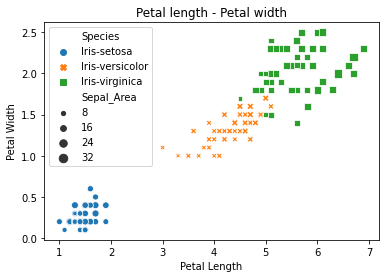

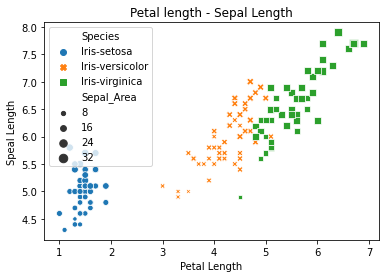

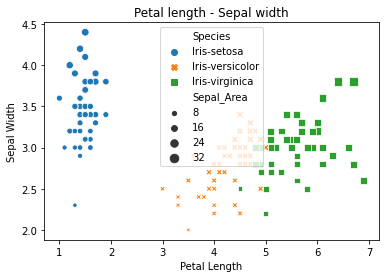

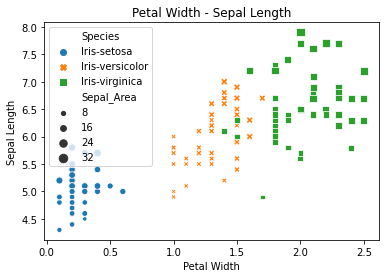

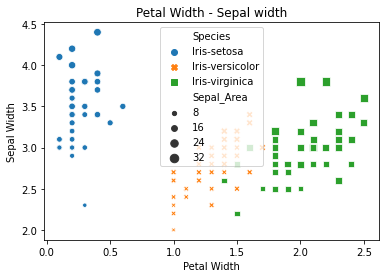

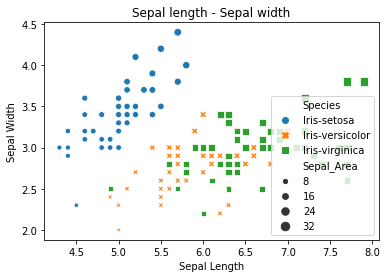

In [10]:
## Plots are generated for each feature vs each feature 
## The size of the markers represent the Sepal Area; Helps in better visualization

plt.figure()
ax0=plt.gca()
sn.scatterplot(irisdata.PetLen,irisdata.PetWid, hue = irisdata.Species,style=irisdata.Species,size=irisdata.Sepal_Area)
ax0.set_xlabel('Petal Length')
ax0.set_ylabel('Petal Width')
ax0.set_title('Petal length - Petal width')

plt.figure()
ax1=plt.gca()
sn.scatterplot(irisdata.PetLen,irisdata.SepLen, hue = irisdata.Species,style=irisdata.Species,size=irisdata.Sepal_Area)
ax1.set_xlabel('Petal Length')
ax1.set_ylabel('Speal Length')
ax1.set_title('Petal length - Sepal Length')

plt.figure()
ax2=plt.gca()
sn.scatterplot(irisdata.PetLen,irisdata.SepWid, hue = irisdata.Species,style=irisdata.Species,size=irisdata.Sepal_Area)
ax2.set_xlabel('Petal Length')
ax2.set_ylabel('Sepal Width')
ax2.set_title('Petal length - Sepal width')

plt.figure()
#plt.subplot(4,3,4)
ax3=plt.gca()
sn.scatterplot(irisdata.PetWid,irisdata.SepLen, hue = irisdata.Species,style=irisdata.Species,size=irisdata.Sepal_Area)
ax3.set_xlabel('Petal Width')
ax3.set_ylabel('Sepal Length')
ax3.set_title('Petal Width - Sepal Length')


plt.figure()
#plt.subplot(4,3,5)
ax4=plt.gca()
sn.scatterplot(irisdata.PetWid,irisdata.SepWid, hue = irisdata.Species,style=irisdata.Species,size=irisdata.Sepal_Area)
ax4.set_xlabel('Petal Width')
ax4.set_ylabel('Sepal Width')
ax4.set_title('Petal Width - Sepal width')


plt.figure()
#plt.subplot(4,3,6)
ax5=plt.gca()
sn.scatterplot(irisdata.SepLen,irisdata.SepWid, hue = irisdata.Species,style=irisdata.Species,size=irisdata.Sepal_Area)
ax5.set_xlabel('Sepal Length')
ax5.set_ylabel('Sepal Width')
ax5.set_title('Sepal length - Sepal width')


 Q3 : Normalize the Data set

In [11]:
normiris=normalized_vector(irisarray1)

In [12]:
# Q3 A : Mean

In [13]:
meansubdata=meansubtract(normiris)

In [14]:
# Q3 B : Covariance matrix 

In [15]:
### Covariance matrix is a symmetric matrix
covariance=covarianceMatrix(meansubdata)

In [16]:
#### EigenValues and the largest eigenvectors as PCs
eigvecPC=eigenPCA(covariance)
pcadata=principalComponents(meansubdata,eigvecPC,2)

In [17]:
#Preparing for visualizatioin

Text(0.5, 1.0, 'Pricipal Components PC-1 - PC-2 Scatter Plot')

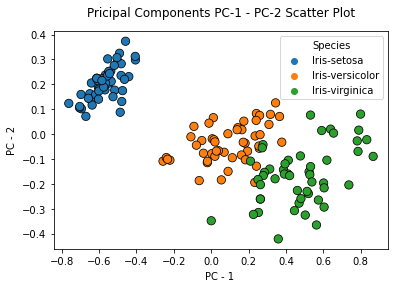

In [18]:
pcadata['Species']=labeloriginal

plt.figure()  
ax=plt.gca()
sn.scatterplot(pcadata.PC1,pcadata.PC2,hue=pcadata.Species,s=70,edgecolor='k')
plt.xlabel('PC - 1 ', labelpad=5)
plt.ylabel('PC - 2', labelpad=5)
plt.title('Pricipal Components PC-1 - PC-2 Scatter Plot', pad=15)